In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df = pd.read_csv("data/kv_listings_with_accessibility_and_noise.csv")
print(df.head())

   Index                                            Address  Room Count  \
0      1  Tartu, Tartu linn, Raadi-Kruusamäe, Kaupmehe t...           3   
1      2                         Tartu, Ülejõe, Staadioni 3           4   
2      3  Tartu, Tartu linn, Raadi-Kruusamäe, Kaupmehe t...           2   
3      4                             Tartu, Ülejõe, Pikk 76           2   
4      5  Tartu, Tartu linn, Raadi-Kruusamäe, Kaupmehe t...           4   

      Size      Price  Teenus_arv Teenustase  Tookoht_protsent  Kool_arv  \
0  64.3 m²  175 900 €         0.0          0          0.000000       0.0   
1    75 m²  235 000 €        37.0   Hea tase         58.684642       2.0   
2  50.8 m²  160 900 €         0.0          0          0.000000       0.0   
3  38.3 m²   89 000 €        33.0   Hea tase         58.533192       2.0   
4    83 m²  209 900 €         4.0          -          6.270224       0.0   

   Lasteaed_arv  Toidupood_arv  Toidukoht_arv  Parkimisnorm  \
0           0.0            0.

In [10]:
df = df.drop(columns=["Index", "Address"])

df["Teenustase"] = df["Teenustase"].replace("-", 0).replace("Baastase", 1).replace("Hea tase", 2)

df["Price"] = df["Price"].str.replace("€", "").str.replace(",", "").str.replace(" ","").astype(float)
df["Size"] = df["Size"].str.replace("m²", "").astype(float)
df["Room Count"] = df["Room Count"].astype(float)

# Calculate price per square meter
df["Price per m2"] = df["Price"] / df["Size"]

# Remove outliers of latitude and longitude
df = df[(df["Latitude"] > 58.2) & (df["Latitude"] < 58.44)]
df = df[(df["Longitude"] > 26.65) & (df["Longitude"] < 226.9)]

Toidukoht_arv          0.324625
Teenus_arv             0.291256
Tookoht_protsent       0.155176
Latitude               0.148148
Noise                  0.113898
Toidupood_arv          0.061296
Teenustase             0.058489
Lasteaed_arv          -0.111592
Parkimis_koefitsent   -0.131927
Parkimisnorm          -0.132180
Size                  -0.162497
Room Count            -0.176295
Kool_arv              -0.218542
Longitude             -0.288090
Distance              -0.365010
Name: Price per m2, dtype: float64


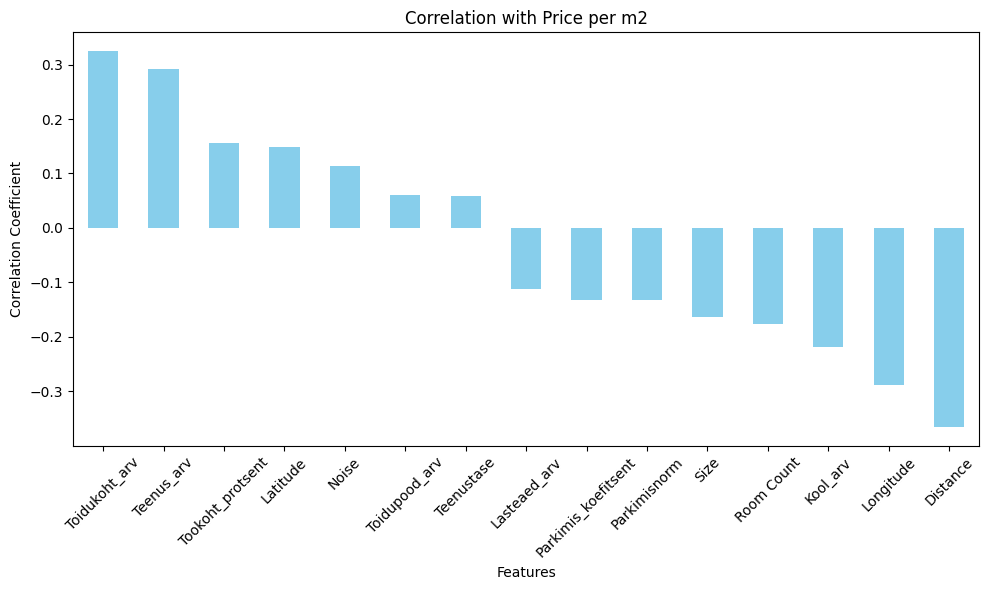

In [11]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Extract correlations with the 'Price' column
price_correlation = correlation_matrix["Price per m2"].sort_values(ascending=False)
price_correlation = price_correlation.drop(["Price per m2", "Price"])

# Print the correlations
print(price_correlation)

# Visualize the correlations as a bar chart
plt.figure(figsize=(10, 6))
price_correlation.plot(kind='bar', color='skyblue')
plt.title("Correlation with Price per m2")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mean Squared Error: 644847.7655031419
Parkimisnorm             126.806948
Lasteaed_arv              25.515125
Teenus_arv                13.835829
Noise                      6.824070
Tookoht_protsent           0.692164
Toidukoht_arv              0.590643
Distance                  -0.375084
Size                      -5.275608
Toidupood_arv             -7.355096
Room Count               -30.684562
Kool_arv                -237.077047
Teenustase              -464.560227
Longitude              -1649.133587
Latitude               -6027.194186
Parkimis_koefitsent   -12756.643509
dtype: float64
R2 Score: 0.30742533352617074


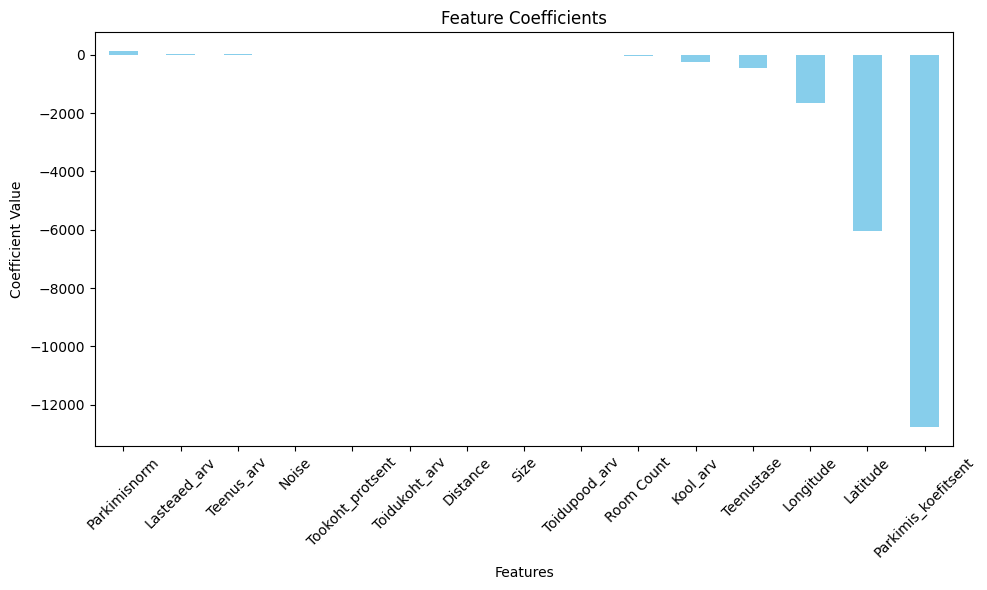

In [12]:
# Create model for predicting price per square meter
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Define the features and target variable
X = df.drop(columns=["Price per m2", "Price"])
y = df["Price per m2"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the coefficients
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)

# Print the coefficients
print(coefficients)

# Print r2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Visualize the coefficients as a bar chart
plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar', color='skyblue')
plt.title("Feature Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_3391/853969665.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace(False, 0).replace(True, 1)


Mean Squared Error: 372308.43426682183
Distance               0.242042
Size                   0.128457
Longitude              0.119645
Latitude               0.111108
Tookoht_protsent       0.098795
Teenus_arv             0.060381
Toidukoht_arv          0.046809
Toidupood_arv          0.044357
Parkimis_koefitsent    0.040780
Parkimisnorm           0.027128
Noise                  0.025101
Room Count             0.021175
Lasteaed_arv           0.020003
Kool_arv               0.007487
Teenustase_1           0.002976
Teenustase_0           0.002571
Teenustase_0           0.000671
Teenustase_2           0.000513
dtype: float64


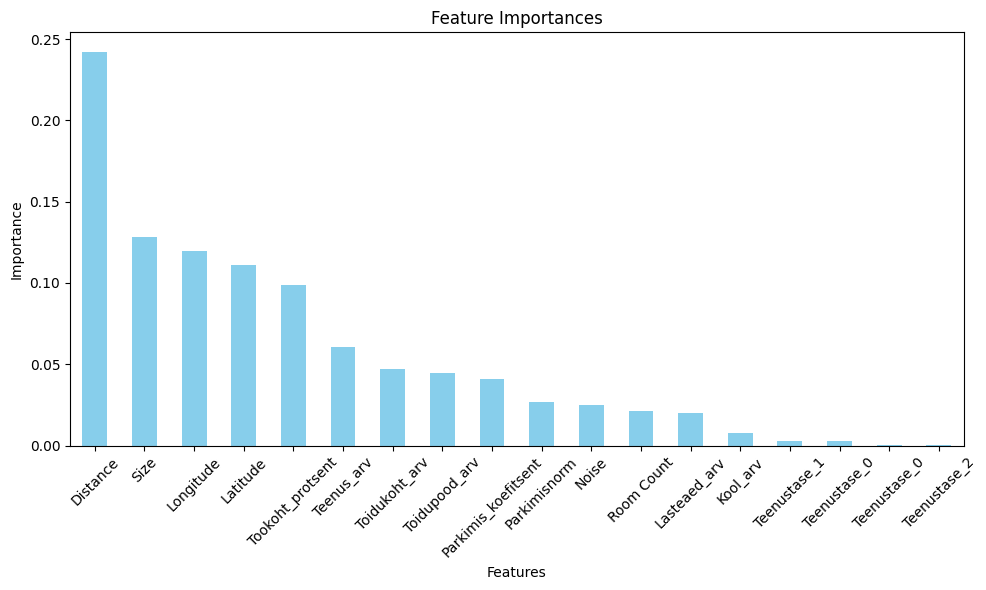

In [ ]:
# Create a random forest classifier for predicting the price per square meter
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the features and target variable
X = df.drop(columns=["Price per m2", "Price"])

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Convert all false values to 0 and true values to 1
X = X.replace(False, 0).replace(True, 1)

y = df["Price per m2"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Create a random forest regressor
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

# Calculate the feature importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Print the feature importances
print(importances)

# Print r2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Visualize the feature importances as a bar chart
plt.figure(figsize=(10, 6))
importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_3391/1086560253.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace(False, 0).replace(True, 1)


Mean Squared Error: 586481.3463563923
Distance               0.323965
Size                   0.123173
Teenus_arv             0.096075
Tookoht_protsent       0.090841
Longitude              0.085903
Toidupood_arv          0.084559
Toidukoht_arv          0.056234
Latitude               0.050832
Parkimis_koefitsent    0.030039
Room Count             0.027552
Noise                  0.017793
Kool_arv               0.006469
Lasteaed_arv           0.004272
Parkimisnorm           0.001688
Teenustase_2           0.000358
Teenustase_1           0.000194
Teenustase_0           0.000048
Teenustase_0           0.000005
dtype: float64


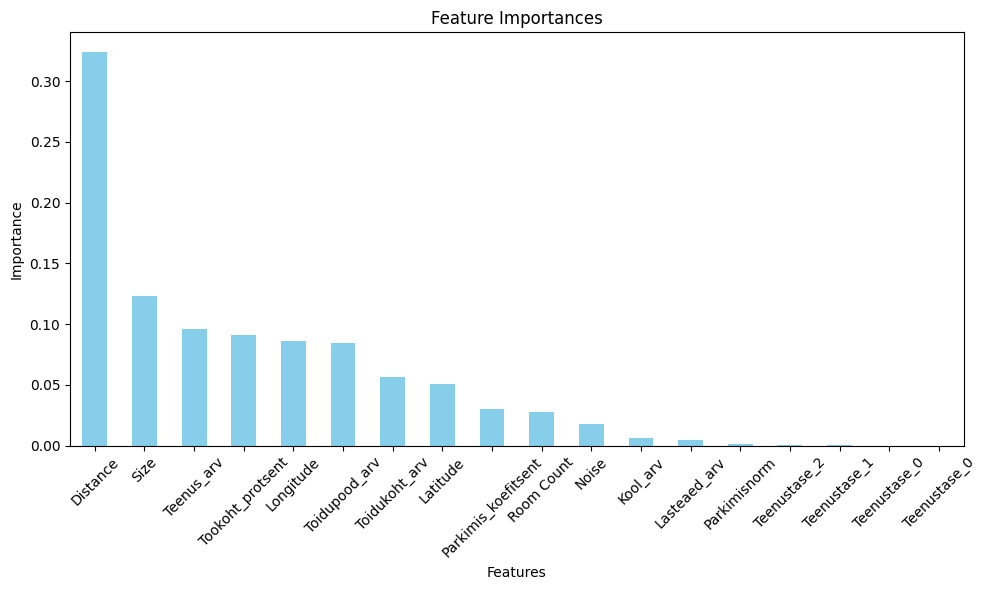

In [ ]:
# Create decision tree model for predicting the price per square meter
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define the features and target variable
X = df.drop(columns=["Price per m2", "Price"])

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Convert all false values to 0 and true values to 1
X = X.replace(False, 0).replace(True, 1)

y = df["Price per m2"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Create a decision tree regressor
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

# Calculate the feature importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Print the feature importances
print(importances)

# Print r2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Visualize the feature importances as a bar chart
plt.figure(figsize=(10, 6))
importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

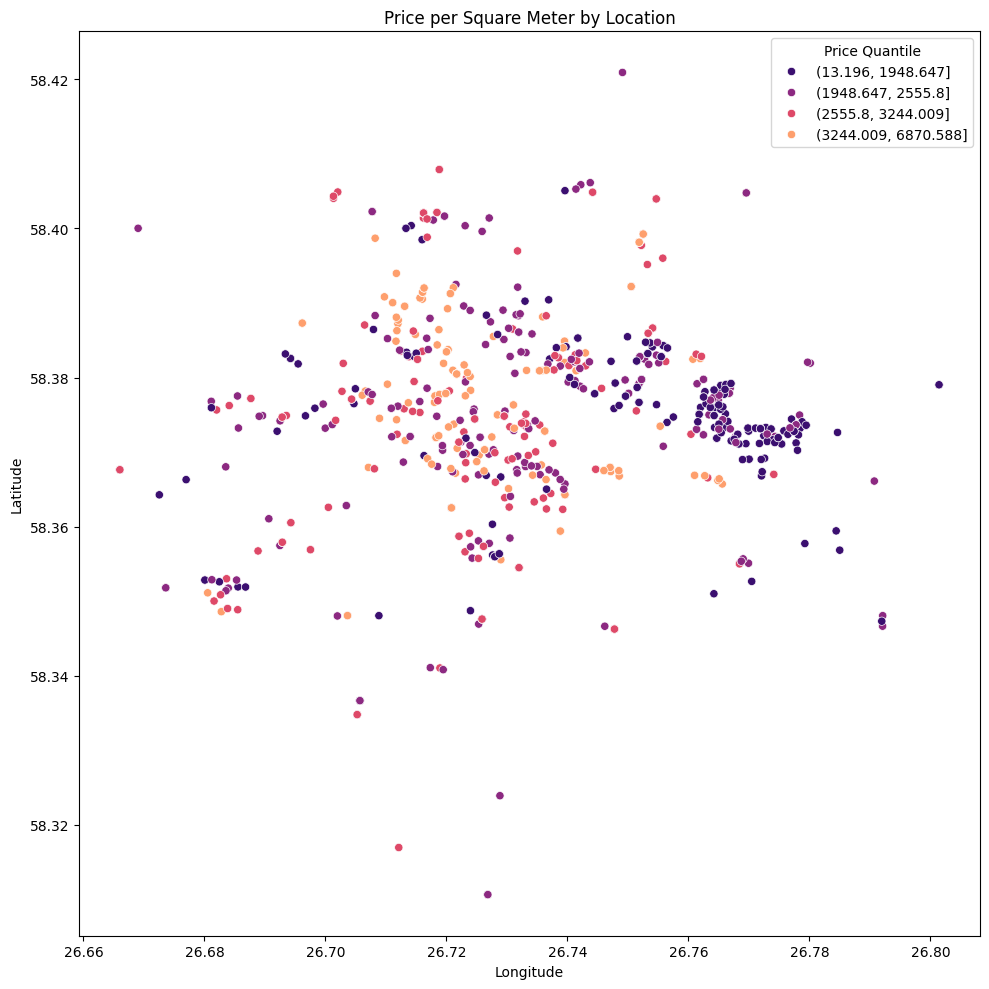

In [15]:
df['Price Quantile'] = pd.qcut(df['Price per m2'], q=4)

# Create heatmap of longitude and latitude and price per square meter
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='Price Quantile', palette='magma', legend='full')
plt.title("Price per Square Meter by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()